# Micro credit defaulter project

# Problem Statement:
           A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

           Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

           Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

           We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

           They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

           They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

           The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

# Predictions:
    To build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

Loading the dataset

In [3]:
df=pd.read_csv(r'C:\Users\Praveen kumar\Downloads\Micro-Credit-Project--1---1-\Micro Credit Project\Data file.csv')

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,6/12/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,7/25/2016


In [5]:
df.shape

(209593, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.dtypes[df.dtypes=='object']

msisdn     object
pcircle    object
pdate      object
dtype: object

In [9]:
df.dtypes[df.dtypes!='object']

Unnamed: 0                int64
label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

Finding the null values percentage in each of the columns in train dataset

In [10]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values present

Checking for blank spaces,random characters in each column

In [11]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in Unnamed: 0 =  0
? in Unnamed: 0 =  0
- in Unnamed: 0 =  0
 ? in Unnamed: 0 =  0
 - in Unnamed: 0 =  0
?  in Unnamed: 0 =  0
-  in Unnamed: 0 =  0
 ?  in Unnamed: 0 =  0
 -  in Unnamed: 0 =  0
NA in Unnamed: 0 =  0
N/A in Unnamed: 0 =  0
 NA in Unnamed: 0 =  0
 N/A in Unnamed: 0 =  0
  in label =  0
? in label =  0
- in label =  0
 ? in label =  0
 - in label =  0
?  in label =  0
-  in label =  0
 ?  in label =  0
 -  in label =  0
NA in label =  0
N/A in label =  0
 NA in label =  0
 N/A in label =  0
  in msisdn =  0
? in msisdn =  0
- in msisdn =  0
 ? in msisdn =  0
 - in msisdn =  0
?  in msisdn =  0
-  in msisdn =  0
 ?  in msisdn =  0
 -  in msisdn =  0
NA in msisdn =  0
N/A in msisdn =  0
 NA in msisdn =  0
 N/A in msisdn =  0
  in aon =  0
? in aon =  0
- in aon =  0
 ? in aon =  0
 - in aon =  0
?  in aon =  0
-  in aon =  0
 ?  in aon =  0
 -  in aon =  0
NA in aon =  0
N/A in aon =  0
 NA in aon =  0
 N/A in aon =  0
  in daily_decr30 =  0
? in daily_decr30 =  0
- in d

There are no blank spaces, random characters in the columns

# Dataset Description
Dropping the Unnamed: 0 column dataset, since it doesn't contribute to building a good model for predicting the target variable values.

In [12]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,6/17/2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,6/12/2016
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,7/29/2016
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,7/25/2016


In [13]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

Dropping msisdn since it doesn't contribute to building a good model for predicting the target variable values

In [14]:
df.drop(columns=['pcircle','msisdn'],inplace=True)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7/20/2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8/10/2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8/19/2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6/6/2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6/17/2016
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6/12/2016
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7/29/2016
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7/25/2016


Getting statistical information of the data

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [16]:
df.dtypes[df.dtypes=='object']

pdate    object
dtype: object

Removing negative values from columns: aon,last_rech_date_ma,last_rech_date_da

In [17]:
df2 = df[['aon','last_rech_date_ma','last_rech_date_da']].copy()

In [18]:
df2[df2 < 0] = np.nan

In [19]:
df2.isnull().sum()

aon                  1539
last_rech_date_ma    1315
last_rech_date_da      14
dtype: int64

In [20]:
df2.dropna(inplace=True)

In [21]:
df2.isnull().sum()

aon                  0
last_rech_date_ma    0
last_rech_date_da    0
dtype: int64

In [22]:
(df2>=0).all

<bound method NDFrame._add_numeric_operations.<locals>.all of          aon  last_rech_date_ma  last_rech_date_da
0       True               True               True
1       True               True               True
2       True               True               True
3       True               True               True
4       True               True               True
...      ...                ...                ...
209588  True               True               True
209589  True               True               True
209590  True               True               True
209591  True               True               True
209592  True               True               True

[206729 rows x 3 columns]>

In [23]:
df2.shape

(206729, 3)

In [24]:
dropindx = df.index.difference(df2.index)

Data loss %:

In [25]:
loss=(209593-206729)/209593 * 100
loss

1.3664578492602328

1.36% data loss is within acceptable range.

In [26]:
df.drop(dropindx,inplace = True)

In [27]:
df.shape

(206729, 34)

In [28]:
df.reset_index(drop=True,inplace = True) 

Interpreting Relationship between Independent and Dependent Variables

# Exploratory data analysis

In [29]:
df.label.value_counts()

1    181068
0     25661
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

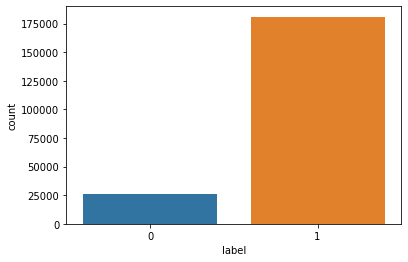

In [30]:
sns.countplot(df.label)

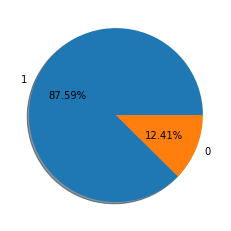

In [31]:
labels = '1', '0'
fig, ax = plt.subplots()
ax.pie(df.label.value_counts(),labels = labels, autopct = '%1.2f%%', shadow=True)
plt.show()

The classes are heavily unbalanced since '1' has 75.04% more data than '0'

# Analyzing the Feature Columns

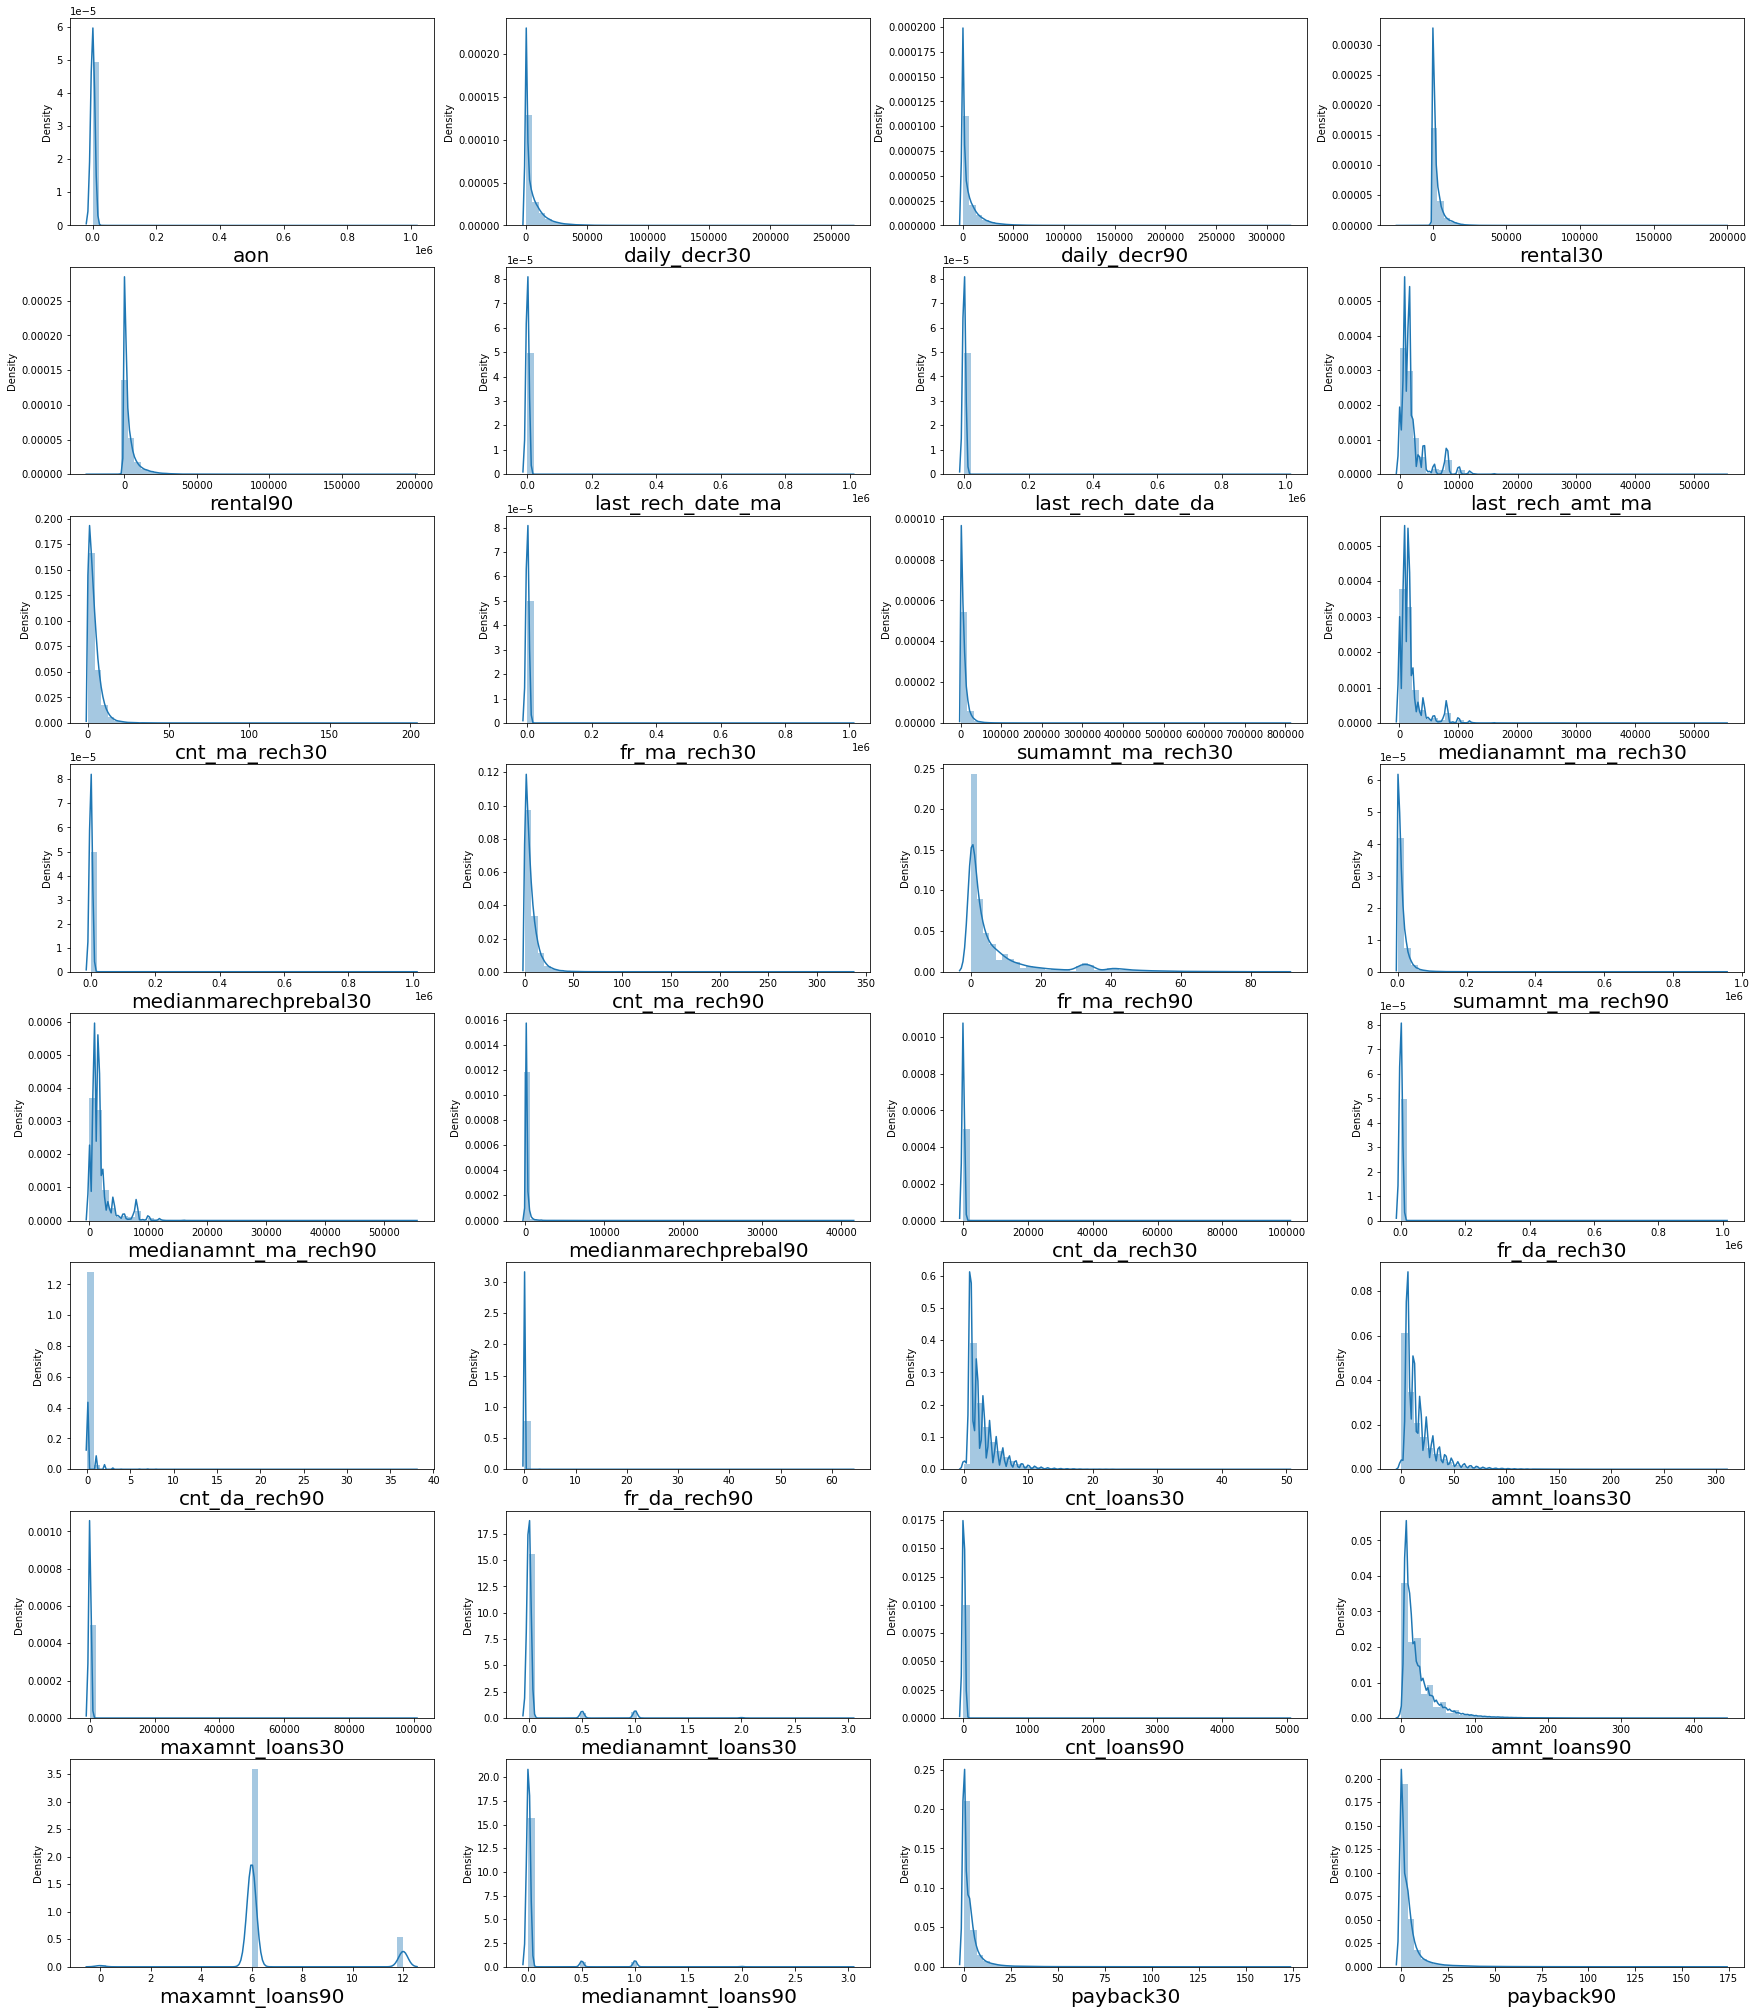

In [32]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
X = df.drop(columns = 'label')
for col in X[X.columns[X.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(10,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [33]:
df[df.columns[df.dtypes!='object']].skew()

label                   -2.279902
aon                     10.343268
daily_decr30             3.924860
daily_decr90             4.229384
rental30                 4.504260
rental90                 4.417694
last_rech_date_ma       14.733120
last_rech_date_da       14.795427
last_rech_amt_ma         3.737726
cnt_ma_rech30            3.268107
fr_ma_rech30            14.744045
sumamnt_ma_rech30        6.373924
medianamnt_ma_rech30     3.451875
medianmarechprebal30    14.750563
cnt_ma_rech90            3.409619
fr_ma_rech90             2.290466
sumamnt_ma_rech90        4.881151
medianamnt_ma_rech90     3.696273
medianmarechprebal90    45.156956
cnt_da_rech30           17.750770
fr_da_rech30            14.793708
cnt_da_rech90           27.132224
fr_da_rech90            28.788749
cnt_loans30              2.696899
amnt_loans30             2.959470
maxamnt_loans30         17.686728
medianamnt_loans30       4.575132
cnt_loans90             16.591969
amnt_loans90             3.132718
maxamnt_loans9

# Checking for outliers

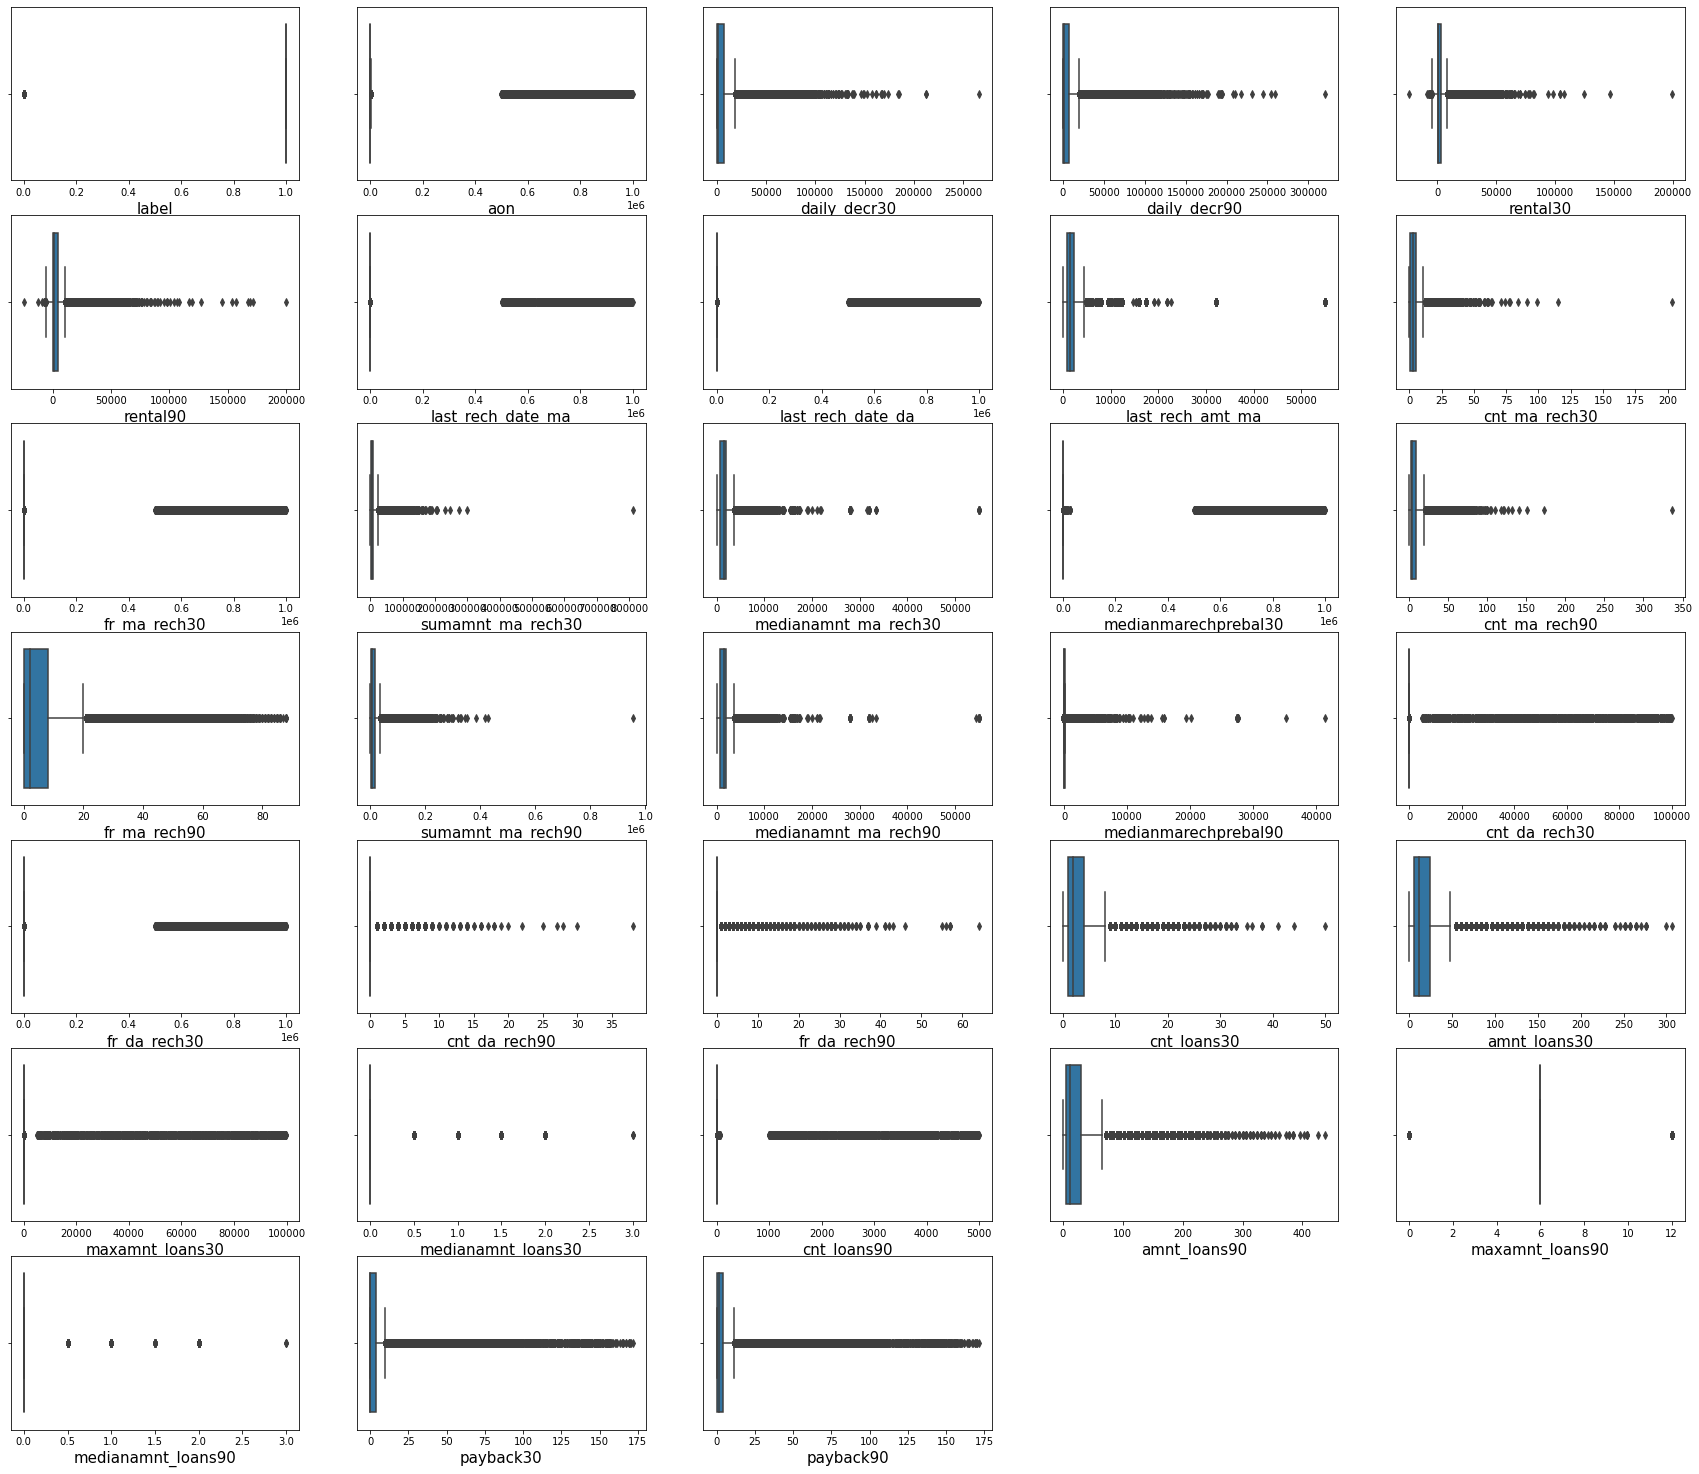

In [34]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in df[df.columns[df.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

These are the considerable outliers in the columns

Removing outliers using ZScore

In [35]:
df1=df[df.columns[df.dtypes != 'object']].copy()

In [36]:
from scipy.stats import zscore
zscor = zscore(df1)
z_score_abs = np.abs(zscor)

df3 = df1[(z_score_abs < 3).all(axis=1)]

In [37]:
df3.shape

(159339, 33)

In [38]:
df1.shape

(206729, 33)

In [39]:
#Data loss
loss=(206729-159339)/206729*100
loss

22.92373106821007

22.92% data loss is not acceptable

# Using IQR Method

In [40]:
df4 =df[df.columns[df.dtypes != 'object']].copy()

In [41]:
indxdrop = np.array([])
for colm in df4:
    q1 = df[colm].quantile(0.00)
    q3 = df[colm].quantile(0.985)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df4[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)

In [42]:
df4 = df4.drop(indxdrop)

In [43]:
df4.shape

(193412, 33)

In [44]:
loss=(206729-193412)/206729 * 100
loss

6.4417667574457385

6.44% data loss is acceptable.

In [45]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
label,193412.0,0.875747,0.329871,0.000000,1.000000,1.000000,1.0000,1.000
aon,193412.0,659.442294,497.444325,1.000000,248.000000,524.000000,966.0000,2440.000
daily_decr30,193412.0,5282.026184,8562.398433,-93.012667,44.063167,1502.933333,7251.0285,91464.623
daily_decr90,193412.0,5964.313882,10080.236638,-93.012667,44.290250,1528.820000,7815.9850,108431.650
rental30,193412.0,2653.998000,4134.522849,-7786.750000,284.460000,1083.590000,3321.2700,76890.320
rental90,193412.0,3440.096639,5563.134578,-7786.750000,306.000000,1336.615000,4169.9600,95400.340
last_rech_date_ma,193412.0,6.155275,9.347426,0.000000,1.000000,3.000000,7.0000,113.000
last_rech_date_da,193412.0,0.709268,5.694120,0.000000,0.000000,0.000000,0.0000,92.000
last_rech_amt_ma,193412.0,2037.768179,2235.142582,0.000000,770.000000,1539.000000,2309.0000,22609.000
cnt_ma_rech30,193412.0,3.969635,4.081240,0.000000,1.000000,3.000000,5.0000,45.000


In [46]:
df.drop(indxdrop,inplace=True)

In [47]:
df.reset_index(drop=True,inplace = True)

In [48]:
df.shape

(193412, 34)

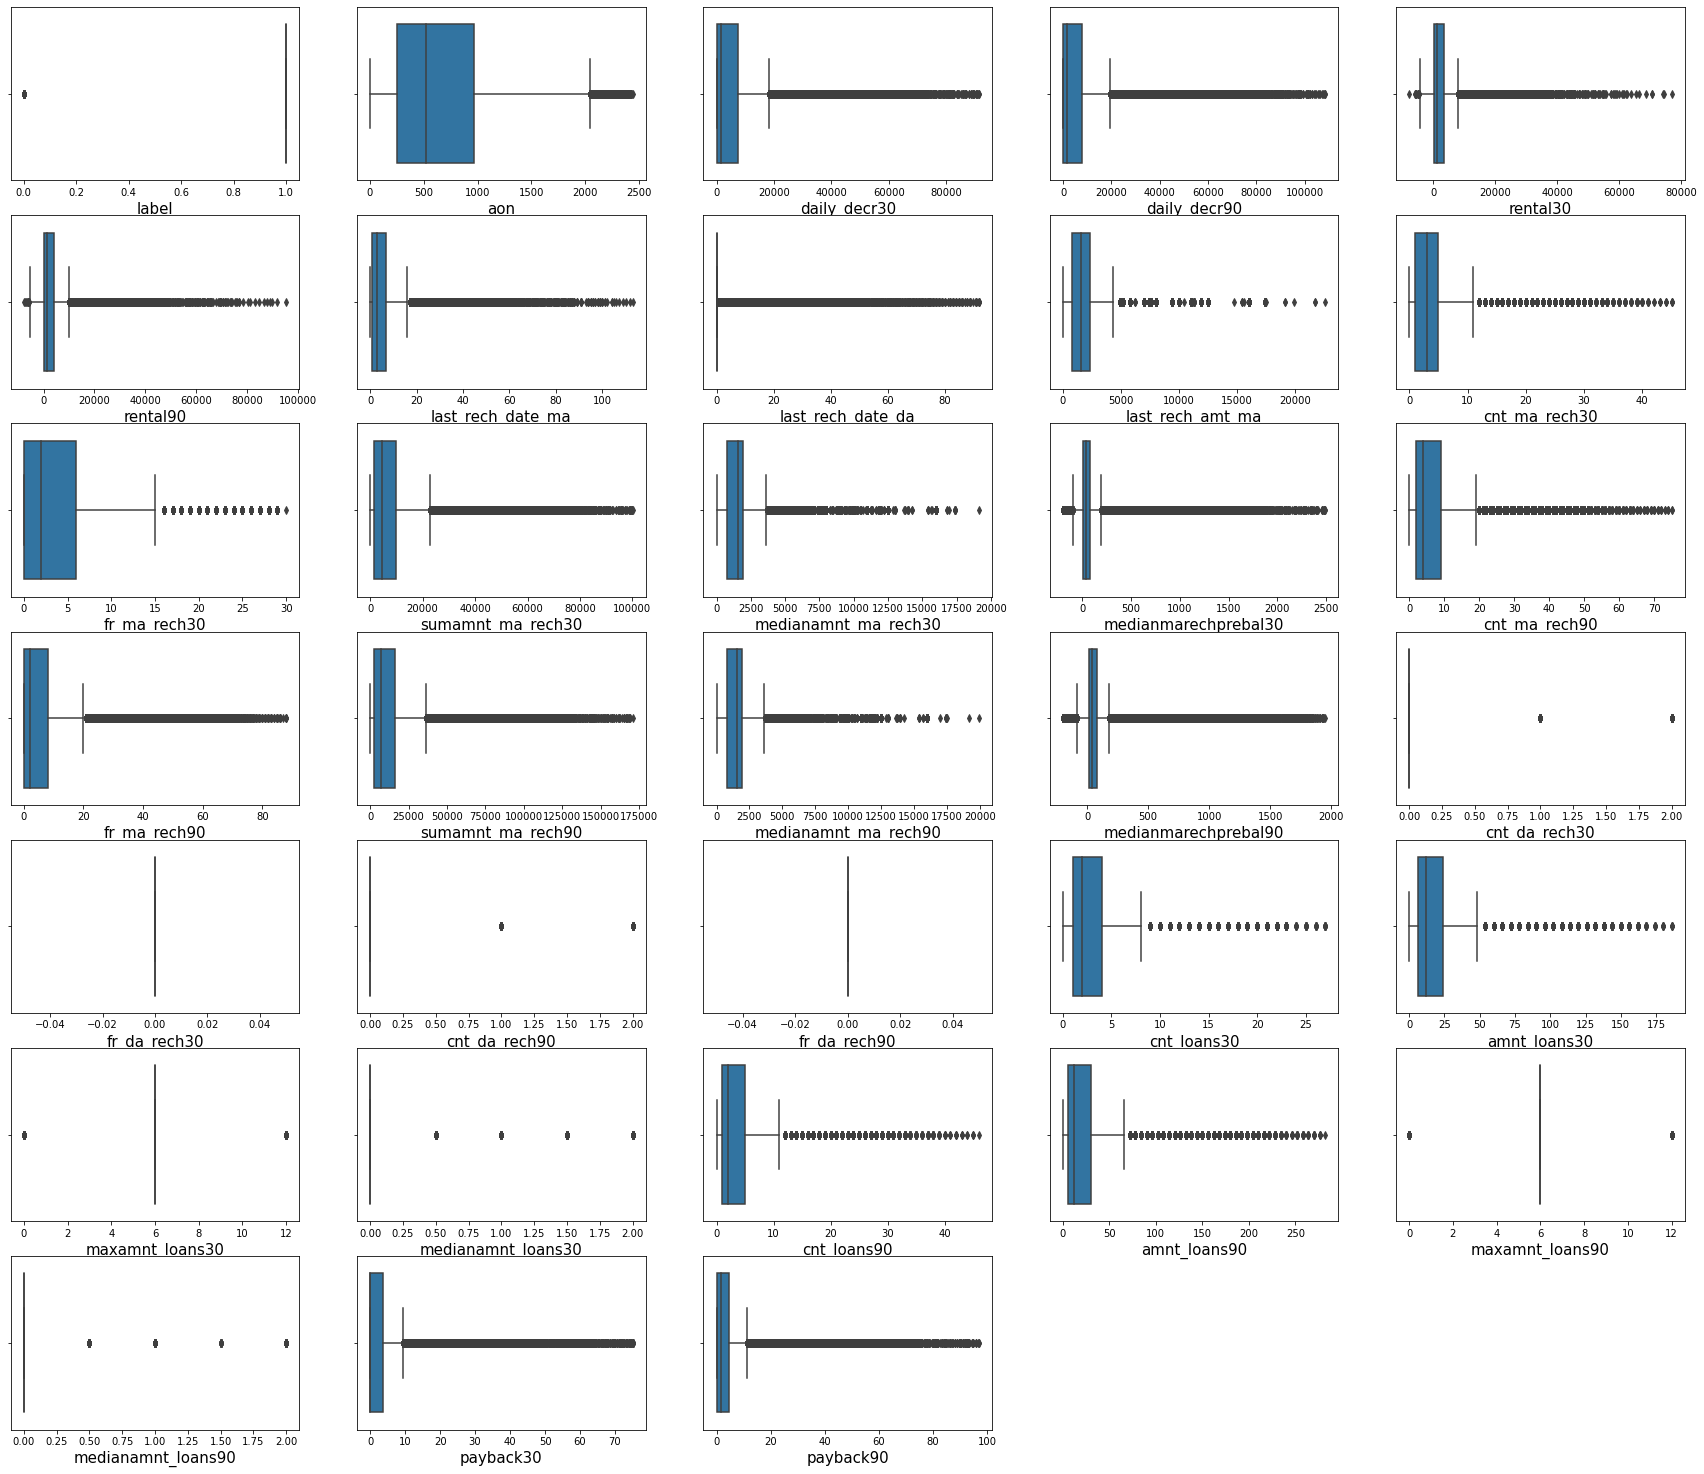

In [49]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in df[df.columns[df.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

Total Data loss %

In [50]:
loss=(209593-193412)/209593 * 100
loss

7.720200579217817

7.72% is within the acceptable range of 7%-8% data loss

Interpreting Relationship between Dependent Variable and Independent Variable Columns

Text(0.5, 1.0, 'Trend')

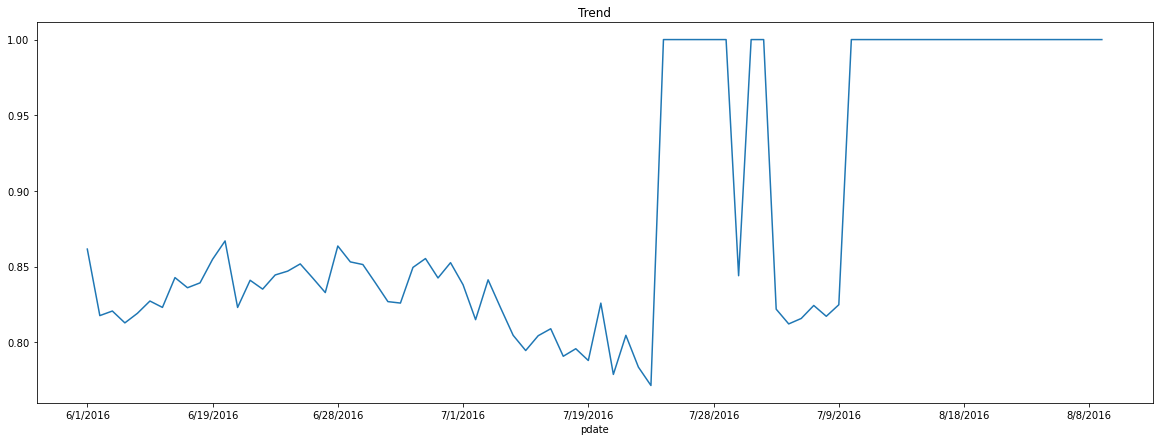

In [51]:
plt.figure(figsize=(20,7))
df.groupby('pdate').mean()['label'].plot()
plt.title('Trend')

Extracting Month and Day data from pdate column

In [52]:
df['pdate']=pd.to_datetime(df['pdate']) 
df['Day']=df['pdate'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe
df['Month']=df['pdate'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe

In [53]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193407,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17,17,6
193408,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12,12,6
193409,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29,29,7
193410,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25,25,7


Dropping 'pdate' column since it doesn't contribute to building a good model for predicting the target variable values.

In [54]:
df.drop(columns = ['pdate'],inplace = True)

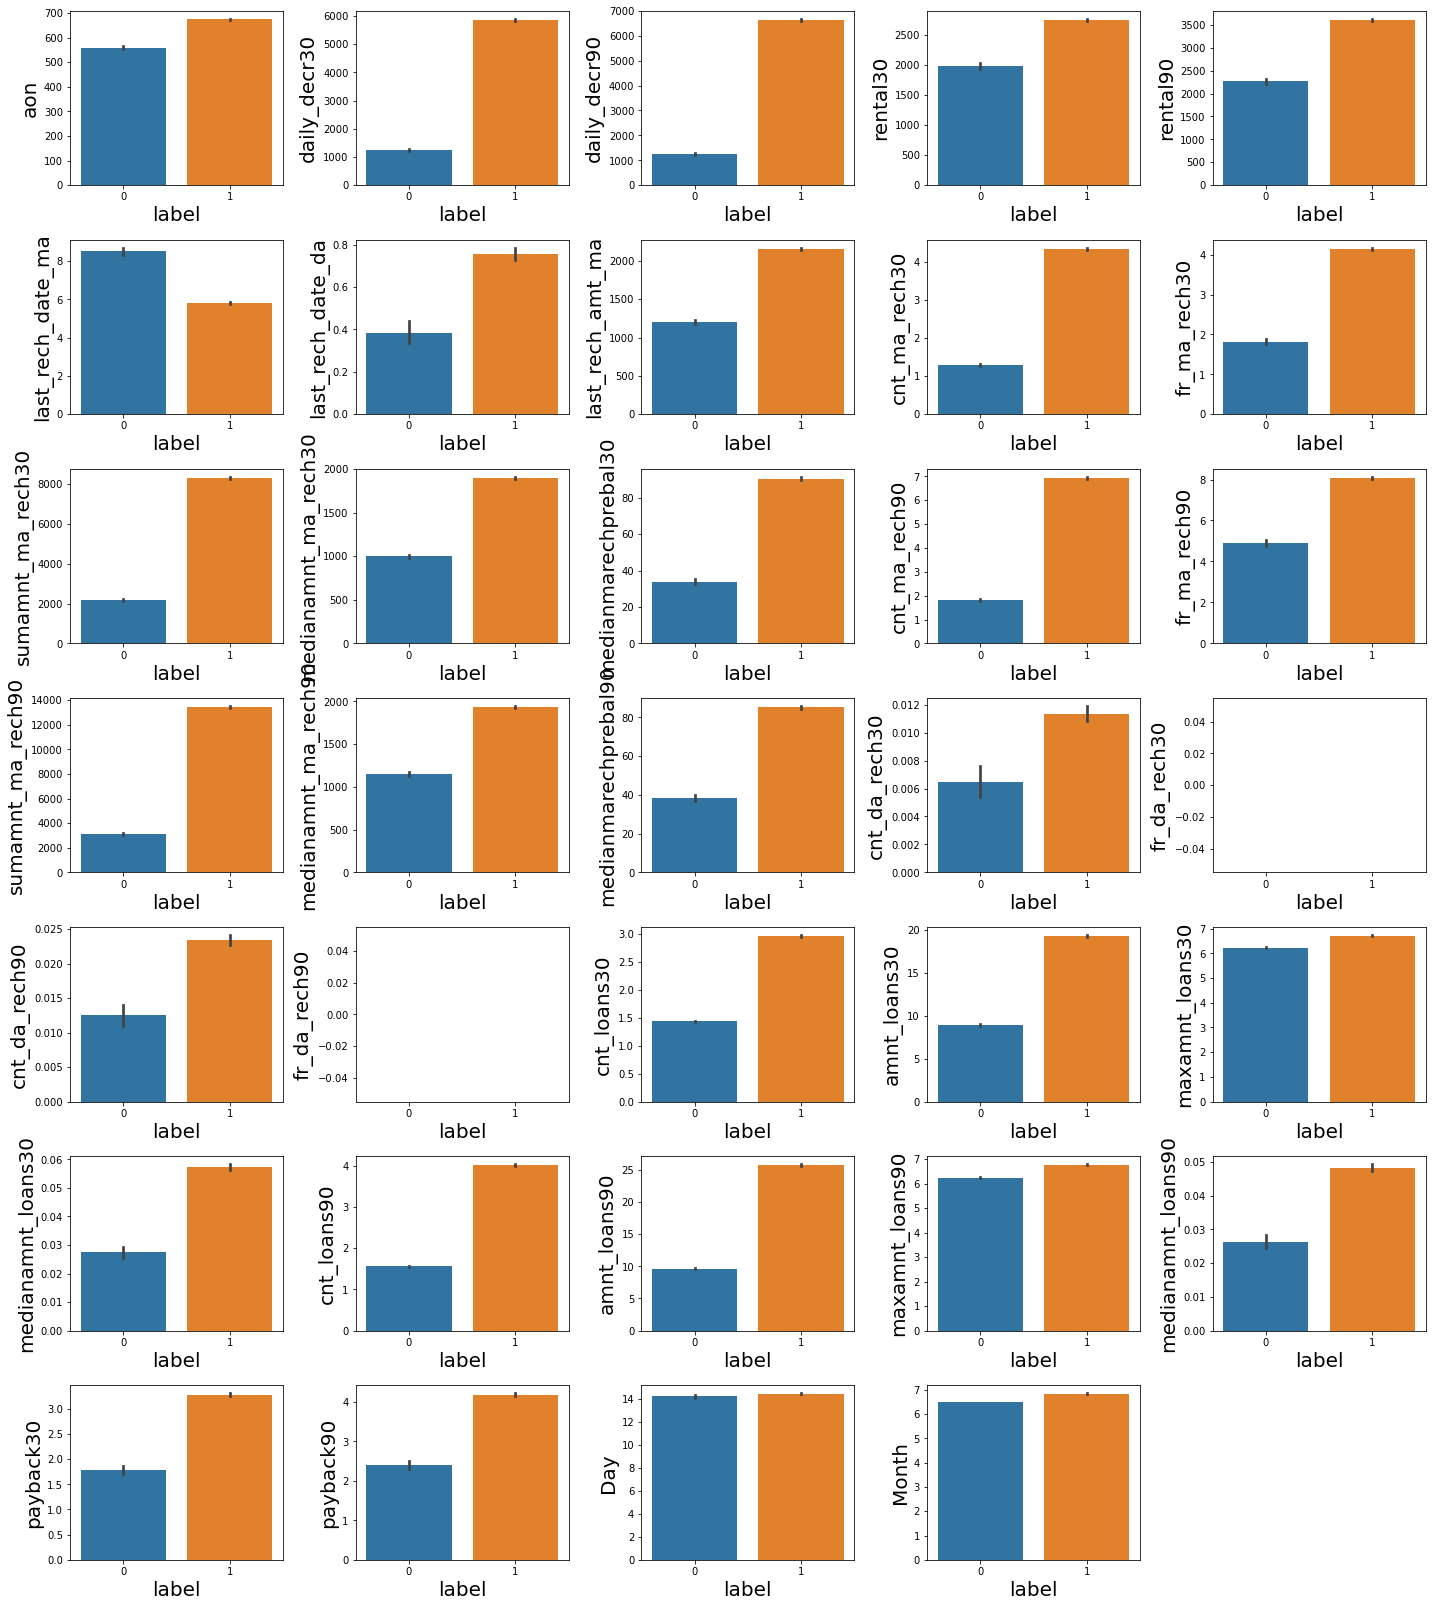

In [55]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['label']
X = df.drop(columns='label').copy()
for col in X:
    if plotnum<=40:
        plt.subplot(8,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('label',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observations: From above graphs it can be observed that columns maxamnt_loans30,maxamnt_loans90,day, cnt_da_rech30 do not show a strong relation with Label

1)Clients who have been on cellular for 550 days and below are more likely to be defaulters

2)Clients who spent under 1000 Indonesian Rupiah or less on average over the last 30 days and 90 days are more likely to be defaulters

3)Clients whose average main account balance over last 30 days was under 2000 Indonesian Rupiah and under under 2500 Indonesian Rupiah over last 90 days are more likely to be defaulters

4)Clients who haven't recharged their main account in over 8 days are highly likely to be defaulters

5)Clients who haven't recharged their data account in over 4 days are highly likely to be defaulters

6)Clients whose last recharge of main account amounted to under 1500 Indonesian Rupiah are more likely to be defaulters

7)Accounts that were recharged less than 2 times in last 30 days are more likely to be of defaulters

8)Accounts that were recharged less than 2 days in last 30 days are more likely to be of defaulters

9)Clients whose total amount of recharge in main account over last 30 days was under 2000 Indonesian Rupiah are more likely to be defaulters

10)Clients whose Median amount of recharges done in main account over last 30 days at user level was under 1000 Indonesian Rupiah are more likely to be defaulters

11)Clients whose Median of main account balance just before recharge in last 30 days at user level was under 40 Indonesian Rupiah are more likely to be defaulters

12)Clients whose main account was recharged for less than 2 times in last 90 days are more likely to be defaulters

13)Accounts that were recharged less than 2 days in last 90 days are more likely to be of defaulters

14)Clients whose total amount of recharge in main account over last 90 days 4000 Indonesian Rupiah are more likely to be defaulters

15)Clients whose Median of main account balance just before recharge in last 90 days at user level was under 40 Indonesian Rupiah are more likely to be defaulters

16)Clients whose Median of main account balance just before recharge in last 90 days at user level was under 40 Indonesian Rupiah are more likely to be defaulters

17)Clients who recharged their data account got recharged in last 30 days and 90 days, very few times are more likely to be defaulters

18)Clients who took more loans in total in last 30 days and 90 days, had a higher median and maximum amount of loans paid them off successfully.

1)Clients with average payback time lower than 2 days in last 30 days and under 3 days are more likely to be defaulters

In [56]:
df.drop(columns=['fr_da_rech90','fr_da_rech30'],inplace=True)

# Reducing skewness using PowerTransformer

In [57]:
df.skew()

label                   -2.278171
aon                      0.953381
daily_decr30             2.923112
daily_decr90             3.075379
rental30                 3.494062
rental90                 3.588934
last_rech_date_ma        3.560123
last_rech_date_da        9.429179
last_rech_amt_ma         2.295547
cnt_ma_rech30            2.224706
fr_ma_rech30             1.837611
sumamnt_ma_rech30        2.866868
medianamnt_ma_rech30     2.502395
medianmarechprebal30     5.019147
cnt_ma_rech90            2.413422
fr_ma_rech90             2.287548
sumamnt_ma_rech90        2.929320
medianamnt_ma_rech90     2.521917
medianmarechprebal90     4.798134
cnt_da_rech30           10.721319
cnt_da_rech90            7.349021
cnt_loans30              2.403461
amnt_loans30             2.548222
maxamnt_loans30          1.433601
medianamnt_loans30       4.567297
cnt_loans90              2.667141
amnt_loans90             2.755047
maxamnt_loans90          1.689284
medianamnt_loans90       4.925587
payback30     

In [58]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
x = df.copy()

In [59]:
x.drop(columns=['label'],inplace=True)

In [60]:
transformed= powtrans.fit_transform(x)

In [61]:
transformed = pd.DataFrame(transformed, columns=x.columns) 

In [62]:
transformed.skew()

aon                    -0.053292
daily_decr30           -6.247376
daily_decr90           -6.726533
rental30                0.644457
rental90                0.650911
last_rech_date_ma       0.038932
last_rech_date_da       6.674096
last_rech_amt_ma       -0.089193
cnt_ma_rech30          -0.003111
fr_ma_rech30            0.129648
sumamnt_ma_rech30      -0.329213
medianamnt_ma_rech30   -0.212072
medianmarechprebal30    1.009060
cnt_ma_rech90          -0.005902
fr_ma_rech90            0.139975
sumamnt_ma_rech90      -0.227933
medianamnt_ma_rech90   -0.071667
medianmarechprebal90    1.275602
cnt_da_rech30           9.741271
cnt_da_rech90           6.684611
cnt_loans30             0.036957
amnt_loans30            0.004161
maxamnt_loans30         0.414419
medianamnt_loans30      3.463491
cnt_loans90             0.094874
amnt_loans90           -0.006755
maxamnt_loans90         0.361706
medianamnt_loans90      3.803944
payback30               0.282249
payback90               0.195861
Day       

In [63]:
transformed.index = x.index

In [64]:
x = transformed

In [65]:
x.skew()

aon                    -0.053292
daily_decr30           -6.247376
daily_decr90           -6.726533
rental30                0.644457
rental90                0.650911
last_rech_date_ma       0.038932
last_rech_date_da       6.674096
last_rech_amt_ma       -0.089193
cnt_ma_rech30          -0.003111
fr_ma_rech30            0.129648
sumamnt_ma_rech30      -0.329213
medianamnt_ma_rech30   -0.212072
medianmarechprebal30    1.009060
cnt_ma_rech90          -0.005902
fr_ma_rech90            0.139975
sumamnt_ma_rech90      -0.227933
medianamnt_ma_rech90   -0.071667
medianmarechprebal90    1.275602
cnt_da_rech30           9.741271
cnt_da_rech90           6.684611
cnt_loans30             0.036957
amnt_loans30            0.004161
maxamnt_loans30         0.414419
medianamnt_loans30      3.463491
cnt_loans90             0.094874
amnt_loans90           -0.006755
maxamnt_loans90         0.361706
medianamnt_loans90      3.803944
payback30               0.282249
payback90               0.195861
Day       

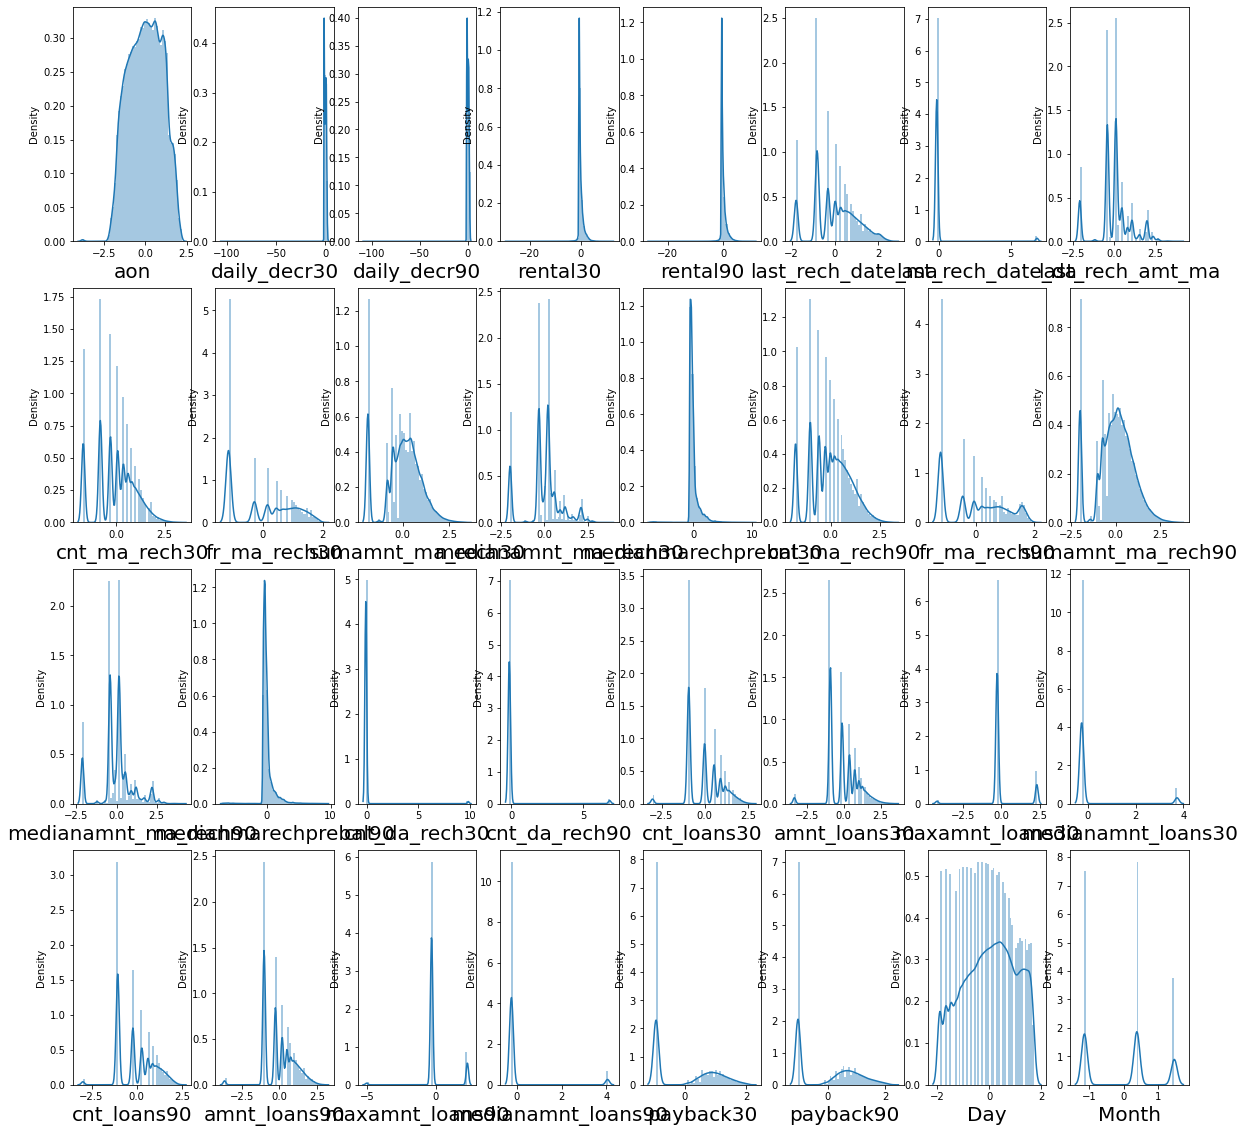

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=40:
        plt.subplot(5,8,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Finding Correlation

In [67]:
x['label'] = df['label']

In [68]:
i_corr =x.corr()

In [69]:
i_corr.T

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,label
aon,1.000000,0.097966,0.098630,0.064587,0.067967,0.055412,0.019017,0.094408,0.029386,0.061708,...,-0.001561,0.104481,0.103242,0.036399,-0.008705,0.071730,0.100998,0.009384,0.080359,0.095276
daily_decr30,0.097966,1.000000,0.996872,0.442781,0.472454,0.103626,0.035691,0.352540,0.472432,0.271153,...,0.004798,0.482387,0.517165,0.336307,-0.033620,0.305436,0.373166,-0.022739,0.794971,0.240468
daily_decr90,0.098630,0.996872,1.000000,0.443848,0.481505,0.106584,0.034925,0.349611,0.464853,0.269211,...,0.007069,0.482334,0.517533,0.337445,-0.033119,0.301126,0.372572,-0.032377,0.805976,0.242029
rental30,0.064587,0.442781,0.443848,1.000000,0.959592,0.017708,-0.006931,0.137962,0.251825,0.110950,...,-0.016287,0.255651,0.279276,0.205262,-0.038923,0.172124,0.205716,0.028099,0.392749,0.064935
rental90,0.067967,0.472454,0.481505,0.959592,1.000000,0.028680,-0.007287,0.137780,0.251080,0.116840,...,-0.011059,0.271044,0.296698,0.218002,-0.038452,0.173421,0.219680,0.007169,0.449223,0.081378
last_rech_date_ma,0.055412,0.103626,0.106584,0.017708,0.028680,1.000000,0.032654,0.530175,-0.017155,0.056573,...,0.034081,-0.045230,-0.052514,-0.012298,0.027525,-0.096255,-0.021435,0.030642,0.099065,0.061574
last_rech_date_da,0.019017,0.035691,0.034925,-0.006931,-0.007287,0.032654,1.000000,0.023299,0.002378,0.015469,...,0.008252,0.011553,0.013030,0.021437,0.005606,0.010670,0.029174,0.029949,0.030104,0.023993
last_rech_amt_ma,0.094408,0.352540,0.349611,0.137962,0.137780,0.530175,0.023299,1.000000,0.324606,0.279620,...,0.037152,0.196414,0.203247,0.142938,0.024466,0.147841,0.185341,0.054501,0.162136,0.264859
cnt_ma_rech30,0.029386,0.472432,0.464853,0.251825,0.251080,-0.017155,0.002378,0.324606,1.000000,0.422793,...,-0.048003,0.696301,0.688106,0.181434,-0.062501,0.544982,0.488544,0.091378,0.197485,0.346784
fr_ma_rech30,0.061708,0.271153,0.269211,0.110950,0.116840,0.056573,0.015469,0.279620,0.422793,1.000000,...,0.013195,0.335475,0.318941,0.096628,-0.010172,0.419780,0.397993,0.080285,0.142195,0.245620


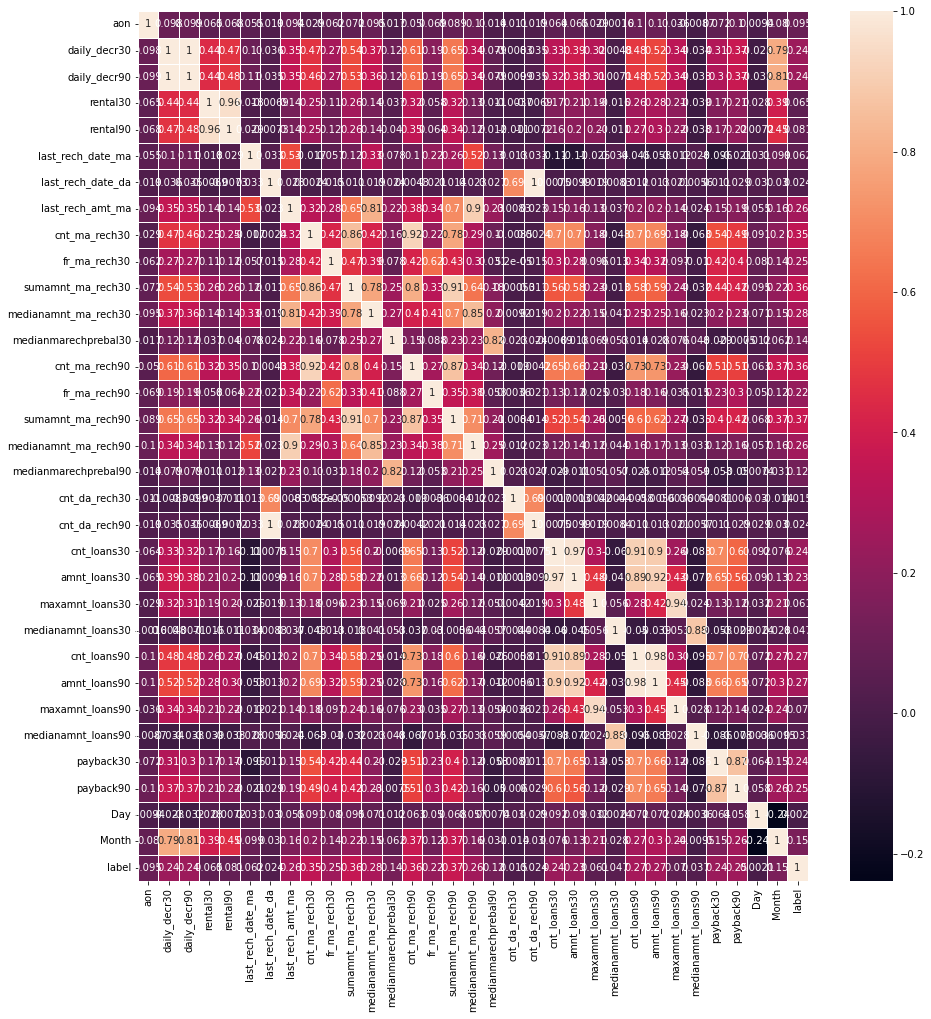

In [70]:
plt.figure(figsize=(15,16))
sns.heatmap(i_corr,annot=True,linewidth=1)
plt.show()

Based on the strength with target column and ANOVA f-score, the columns with the least strength and lowest fclassif scores and based on Multicollinearity scores will be dropped.

# Visualizing correlation of feature columns with label column.

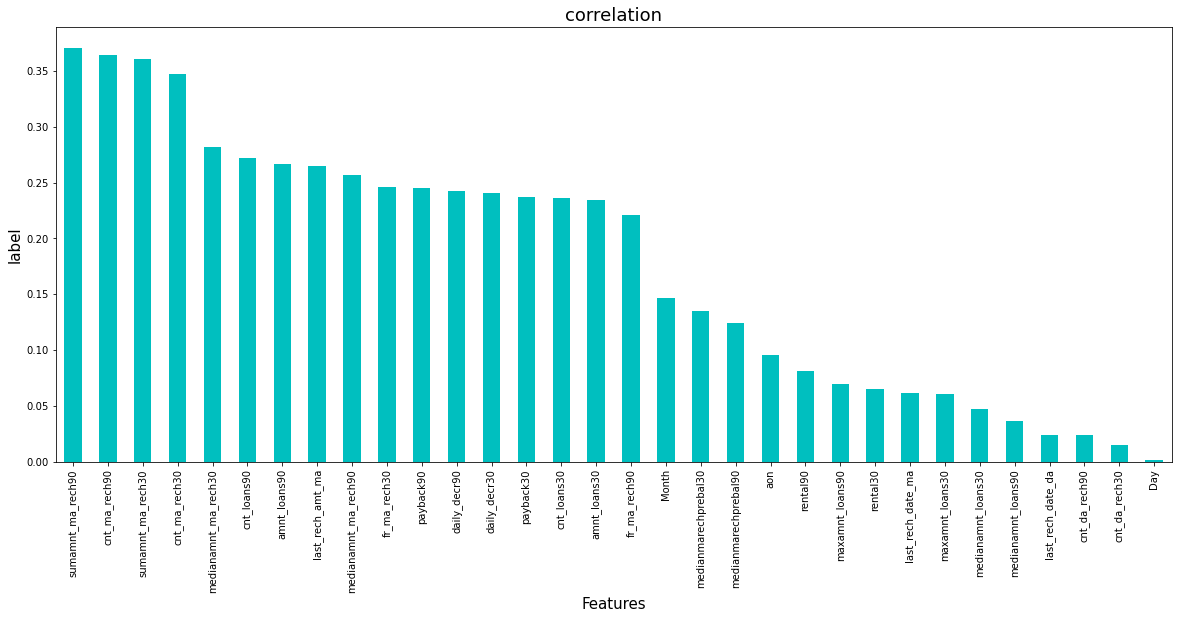

In [71]:
plt.figure(figsize = (20,8))
x.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('label',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

# Feature Selection

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
y =x['label']
X =x.drop(columns=['label'])

In [74]:
scaler= StandardScaler()

In [75]:
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = pd.DataFrame()

In [78]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [79]:
vif

,Features,vif
0,aon,1.034532
1,daily_decr30,218.346330
2,daily_decr90,232.865688
3,rental30,14.699983
4,rental90,15.736567
5,last_rech_date_ma,2.001627
6,last_rech_date_da,284.728364
7,last_rech_amt_ma,6.747128
8,cnt_ma_rech30,55.272045
9,fr_ma_rech30,2.076616


# Selecting Kbest Features

In [80]:
from sklearn.feature_selection import SelectKBest, f_classif

In [81]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [82]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(33,'Score'))

                 Feature         Score
15     sumamnt_ma_rech90  30785.878512
13         cnt_ma_rech90  29578.857419
10     sumamnt_ma_rech30  28959.946036
8          cnt_ma_rech30  26438.887086
11  medianamnt_ma_rech30  16640.272483
24           cnt_loans90  15488.925009
25          amnt_loans90  14791.109362
7       last_rech_amt_ma  14591.390774
16  medianamnt_ma_rech90  13609.721267
9           fr_ma_rech30  12417.351148
29             payback90  12388.499125
2           daily_decr90  12034.551650
1           daily_decr30  11870.253607
28             payback30  11491.887935
20           cnt_loans30  11462.641481
21          amnt_loans30  11269.841641
14          fr_ma_rech90   9940.096690
31                 Month   4230.720238
12  medianmarechprebal30   3593.572125
17  medianmarechprebal90   3034.456834
0                    aon   1771.747218
4               rental90   1289.371705
26       maxamnt_loans90    941.958130
3               rental30    818.971298
5      last_rech_date_ma 

In [83]:
xbest = X.drop(columns=['daily_decr30','cnt_loans30','Day','cnt_da_rech30','amnt_loans30','maxamnt_loans30','cnt_loans90']).copy()

In [84]:
X['cnt_da_rech30']

0        -0.101597
1        -0.101597
2        -0.101597
3        -0.101597
4        -0.101597
            ...   
193407   -0.101597
193408   -0.101597
193409   -0.101597
193410   -0.101597
193411   -0.101597
Name: cnt_da_rech30, Length: 193412, dtype: float64

In [85]:
xbest

,aon,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month
0,-0.708255,0.293164,-0.591897,-0.578277,-0.326564,-0.146613,0.087884,-0.286136,1.731178,-0.184480,...,0.153456,-0.488325,-0.146392,-0.267992,-0.266577,-0.286208,-0.246866,1.837495,1.818339,0.386823
1,0.398892,1.050709,0.369047,0.170172,1.557104,-0.146613,1.523598,-0.805880,-1.128339,0.219149,...,1.713065,-0.027283,-0.146392,-0.267992,-0.266577,2.328026,-0.246866,-0.945145,-1.027233,1.476482
2,0.045220,-0.037615,-0.365308,-0.409218,0.004071,-0.146613,0.087884,-0.805880,-1.128339,-0.545431,...,0.153456,0.012771,-0.146392,-0.267992,-1.020620,-0.286208,-0.246866,-0.945145,-1.027233,1.476482
3,-0.831556,-1.032478,-0.615827,-0.609818,2.058660,-0.146613,-0.289401,-1.684039,-1.128339,-1.896962,...,-0.250449,-0.545379,-0.146392,-0.267992,-0.266577,-0.286208,-0.246866,-0.945145,-1.027233,-1.139659
4,0.774681,-0.692750,-0.306000,-0.362084,0.246769,-0.146613,0.457636,0.989895,0.163728,1.285304,...,0.799124,-0.234787,-0.146392,-0.267992,1.091323,-0.286208,-0.246866,0.628265,0.419369,-1.139659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193407,-0.281307,-0.690923,-0.308852,-0.364349,-0.828819,-0.146613,1.066785,0.085366,0.163728,0.672031,...,0.911291,0.199428,-0.146392,-0.267992,-0.266577,-0.286208,-0.246866,0.080706,-0.113682,-1.139659
193408,0.949415,-0.953335,-0.128547,-0.221526,0.246769,-0.146613,-0.428642,0.375100,-0.269902,-0.181851,...,-0.398715,0.339673,-0.146392,-0.267992,0.177991,-0.286208,-0.246866,0.080706,-0.113682,-1.139659
193409,0.866934,1.038831,0.868020,1.065423,0.004071,-0.146613,0.087884,0.612856,1.129014,0.581912,...,0.153456,-0.135760,-0.146392,-0.267992,1.355340,2.328026,-0.246866,0.968553,0.746187,0.386823
193410,1.652071,1.074443,-0.522346,-0.388988,-0.326564,6.820664,-0.428642,0.612856,0.647626,0.806529,...,0.597920,0.257450,6.830952,-0.267992,0.491389,2.328026,-0.246866,-0.945145,1.348945,0.386823


In [86]:
scaled_x_best = scaler.fit_transform(xbest)

Balancing out classes in Label column using SMOTE technique.

In [87]:
from imblearn.over_sampling import SMOTE as sm

In [88]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = 81)

In [91]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [95]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')

# Training the Models

In [96]:
RFC.fit(x_train,y_train.ravel())
DTC.fit(x_train,y_train)
adbc.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())

LogisticRegression(solver='liblinear')

# Logistic Regression Model Accuracy

In [97]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [98]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[41384, 11129],
       [12760, 39743]], dtype=int64)

In [99]:
print(accu)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78     52513
           1       0.78      0.76      0.77     52503

    accuracy                           0.77    105016
   macro avg       0.77      0.77      0.77    105016
weighted avg       0.77      0.77      0.77    105016



# Random Forest classifier Model accuracy

In [100]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [101]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[49823,  2690],
       [ 2894, 49609]], dtype=int64)

In [102]:
print(accu)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     52513
           1       0.95      0.94      0.95     52503

    accuracy                           0.95    105016
   macro avg       0.95      0.95      0.95    105016
weighted avg       0.95      0.95      0.95    105016



# Decision Tree Classifier Model Accuracy

In [103]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)

In [104]:
conf_matrx = confusion_matrix(y_test,DTCpred)

In [105]:
conf_matrx

array([[47500,  5013],
       [ 5912, 46591]], dtype=int64)

In [106]:
print(accu)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     52513
           1       0.90      0.89      0.90     52503

    accuracy                           0.90    105016
   macro avg       0.90      0.90      0.90    105016
weighted avg       0.90      0.90      0.90    105016



# AdaBoost Classifier Model Accuracy

In [107]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [108]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[45042,  7471],
       [ 9374, 43129]], dtype=int64)

In [109]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     52513
           1       0.85      0.82      0.84     52503

    accuracy                           0.84    105016
   macro avg       0.84      0.84      0.84    105016
weighted avg       0.84      0.84      0.84    105016



# Model Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score as cvs

In [111]:
#Decision Tree Classifier
print(cvs(DTC,smt_x,smt_y,cv=5).mean())

0.8976266383280198


In [112]:
#Logistic Regression
print(cvs(LOGR,smt_x,smt_y,cv=5).mean()) 

0.7720982406423426


In [113]:
#Random Forest Classifier
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.9446599362380447


In [114]:
#Adaboost Classifier
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.837604793954422


Based on comparing Accuracy Score results, with Cross Validation results, it is determined that Random Forest Classifiers is the best model.

# ROC AUC Scores

Logistic Regression

In [115]:
roc_auc_score(y_test,LOGRpred)

0.772518896870165

In [116]:
#DT Classifier
roc_auc_score(y_test,DTCpred)

0.8959674172976837

In [117]:
#Adaboost Classifier
roc_auc_score(y_test,adbcpred)

0.839594144099695

In [118]:
#Random Forest Classifier
roc_auc_score(y_test,RFCpred)

0.9468269646887655

# ROC AUC curves

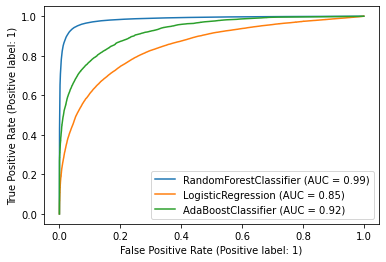

In [120]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,adbc]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Based on the above graph and roc_auc_scores,RandomForest Classifier is the best model for the dataset, with AUC = 0.99 and roc_auc_score = 0.9471

# Hyper Parameter Tuning

In [121]:
parameter = {'n_estimators':[50,100,300],'max_depth': [10,60],'min_samples_leaf':[2,5,30],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
GridCV.best_params_

In [ ]:
Best_mod2 = RandomForestClassifier(n_estimators = 300,criterion = 'entropy', max_depth= 60, max_features = 'sqrt',min_samples_leaf = 2, min_samples_split = 2)
Best_mod2.fit(x_train,y_train)
rfpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

94.52845280719129

In [ ]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[49722,  2791],
       
       [ 2955, 49548]], dtype=int64)

Saving The Model

In [ ]:
import joblib
joblib.dump(Best_mod2,"BestModelMicroCredit_Defaulter.pkl")

['BestModelMicroCredit_Defaulter.pkl']

# Loading The Model

In [ ]:
mod=joblib.load("BestModelMicroCredit_Defaulter.pkl")

In [ ]:
print(mod.predict(x_test))

[1 0 0 ... 1 1 1]

In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)